# Ejercicio 5: Generación de Distribución Normal mediante Transformada Integral

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import erfinv

## Función de generación de distribución normal

In [2]:
def generar_normal_transformada_integral(mu, sigma, n, seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    u = np.random.uniform(0, 1, n)
    
    z = np.sqrt(2) * erfinv(2 * u - 1)
    
    x = mu + sigma * z
    
    return x

## Funciones de análisis estadístico

In [3]:
def estadisticos_descriptivos(muestra, nombre):
    print(f"\n{'='*60}")
    print(f"Estadísticos Descriptivos - {nombre}")
    print(f"{'='*60}")
    print(f"Media: {np.mean(muestra):.6f}")
    print(f"Mediana: {np.median(muestra):.6f}")
    print(f"Desviación estándar: {np.std(muestra, ddof=1):.6f}")
    print(f"Varianza: {np.var(muestra, ddof=1):.6f}")
    print(f"Mínimo: {np.min(muestra):.6f}")
    print(f"Máximo: {np.max(muestra):.6f}")
    print(f"Asimetría: {stats.skew(muestra):.6f}")
    print(f"Curtosis: {stats.kurtosis(muestra):.6f}")

## Pruebas de normalidad y comparación

In [4]:
def prueba_normalidad_shapiro(muestra, nombre):
    print(f"\n{'='*60}")
    print(f"Prueba de Normalidad (Shapiro-Wilk) - {nombre}")
    print(f"{'='*60}")
    if len(muestra) > 5000:
        muestra_reducida = np.random.choice(muestra, 5000, replace=False)
        statistic, p_value = stats.shapiro(muestra_reducida)
        print("Nota: Se usó una submuestra de 5000 observaciones")
    else:
        statistic, p_value = stats.shapiro(muestra)
    
    print(f"Estadístico: {statistic:.6f}")
    print(f"P-valor: {p_value:.6f}")
    if p_value > 0.05:
        print("Conclusión: No se rechaza H0 (los datos siguen una distribución normal)")
    else:
        print("Conclusión: Se rechaza H0 (los datos NO siguen una distribución normal)")

In [5]:
def prueba_kolmogorov_smirnov_dos_muestras(muestra1, muestra2, nombre1, nombre2):
    print(f"\n{'='*60}")
    print(f"Prueba de Kolmogorov-Smirnov (Dos Muestras)")
    print(f"{'='*60}")
    print(f"H0: {nombre1} y {nombre2} provienen de la misma distribución")
    print(f"H1: {nombre1} y {nombre2} NO provienen de la misma distribución")
    print(f"Nivel de significancia: α = 0.05")
    
    statistic, p_value = stats.ks_2samp(muestra1, muestra2)
    
    print(f"\nEstadístico KS: {statistic:.6f}")
    print(f"P-valor: {p_value:.6f}")
    
    if p_value > 0.05:
        print(f"\nConclusión: No se rechaza H0 (p-valor = {p_value:.6f} > 0.05)")
        print("Las dos muestras pueden considerarse provenientes de la misma distribución")
    else:
        print(f"\nConclusión: Se rechaza H0 (p-valor = {p_value:.6f} ≤ 0.05)")
        print("Las dos muestras NO provienen de la misma distribución")
    
    return statistic, p_value

In [6]:
def prueba_chi_cuadrado_dos_muestras(muestra1, muestra2, nombre1, nombre2, k=20):
    print(f"\n{'='*60}")
    print(f"Prueba de Chi-Cuadrado (Dos Muestras)")
    print(f"{'='*60}")
    print(f"H0: {nombre1} y {nombre2} tienen la misma distribución")
    print(f"H1: {nombre1} y {nombre2} NO tienen la misma distribución")
    print(f"Nivel de significancia: α = 0.05")
    print(f"Número de intervalos: {k}")
    
    min_val = min(np.min(muestra1), np.min(muestra2))
    max_val = max(np.max(muestra1), np.max(muestra2))
    bins = np.linspace(min_val, max_val, k + 1)
    
    obs1, _ = np.histogram(muestra1, bins=bins)
    obs2, _ = np.histogram(muestra2, bins=bins)
    
    n1 = len(muestra1)
    n2 = len(muestra2)
    n_total = n1 + n2
    
    expected1 = (obs1 + obs2) * n1 / n_total
    expected2 = (obs1 + obs2) * n2 / n_total
    
    valid_indices = (expected1 >= 5) & (expected2 >= 5)
    obs1 = obs1[valid_indices]
    obs2 = obs2[valid_indices]
    expected1 = expected1[valid_indices]
    expected2 = expected2[valid_indices]
    
    chi2_stat = np.sum((obs1 - expected1)**2 / expected1) + np.sum((obs2 - expected2)**2 / expected2)
    df = len(obs1) - 1
    p_value = 1 - stats.chi2.cdf(chi2_stat, df)
    
    print(f"\nEstadístico Chi²: {chi2_stat:.6f}")
    print(f"Grados de libertad: {df}")
    print(f"P-valor: {p_value:.6f}")
    
    if p_value > 0.05:
        print(f"\nConclusión: No se rechaza H0 (p-valor = {p_value:.6f} > 0.05)")
        print("Las dos muestras tienen la misma distribución")
    else:
        print(f"\nConclusión: Se rechaza H0 (p-valor = {p_value:.6f} ≤ 0.05)")
        print("Las dos muestras NO tienen la misma distribución")
    
    return chi2_stat, p_value

## Funciones de visualización

In [7]:
def graficar_comparacion(muestra_teorica, muestra_empirica, mu, sigma):
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    axes[0, 0].hist(muestra_teorica, bins=50, density=True, alpha=0.7, 
                    label='Muestra Teórica', edgecolor='black', color='blue')
    axes[0, 0].hist(muestra_empirica, bins=50, density=True, alpha=0.5, 
                    label='Muestra Empírica', edgecolor='black', color='red')
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    axes[0, 0].plot(x, stats.norm.pdf(x, mu, sigma), 'g-', linewidth=2, 
                    label='Normal Teórica')
    axes[0, 0].set_title('Histogramas Superpuestos')
    axes[0, 0].set_xlabel('Valor')
    axes[0, 0].set_ylabel('Densidad')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    axes[0, 1].hist(muestra_teorica, bins=50, density=True, alpha=0.7, 
                    edgecolor='black', color='blue')
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    axes[0, 1].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2)
    axes[0, 1].set_title('Muestra Teórica (scipy.stats)')
    axes[0, 1].set_xlabel('Valor')
    axes[0, 1].set_ylabel('Densidad')
    axes[0, 1].grid(True, alpha=0.3)
    
    axes[0, 2].hist(muestra_empirica, bins=50, density=True, alpha=0.7, 
                    edgecolor='black', color='red')
    axes[0, 2].plot(x, stats.norm.pdf(x, mu, sigma), 'b-', linewidth=2)
    axes[0, 2].set_title('Muestra Empírica (Transformada Integral)')
    axes[0, 2].set_xlabel('Valor')
    axes[0, 2].set_ylabel('Densidad')
    axes[0, 2].grid(True, alpha=0.3)
    
    sorted_teorica = np.sort(muestra_teorica)
    sorted_empirica = np.sort(muestra_empirica)
    cdf_teorica = np.arange(1, len(sorted_teorica) + 1) / len(sorted_teorica)
    cdf_empirica = np.arange(1, len(sorted_empirica) + 1) / len(sorted_empirica)
    
    axes[1, 0].plot(sorted_teorica, cdf_teorica, label='CDF Teórica', linewidth=2)
    axes[1, 0].plot(sorted_empirica, cdf_empirica, label='CDF Empírica', linewidth=2)
    x_theory = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    axes[1, 0].plot(x_theory, stats.norm.cdf(x_theory, mu, sigma), 'g--', 
                    label='CDF Normal Teórica', linewidth=2)
    axes[1, 0].set_title('Funciones de Distribución Acumulada')
    axes[1, 0].set_xlabel('Valor')
    axes[1, 0].set_ylabel('Probabilidad Acumulada')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    stats.probplot(muestra_teorica, dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title('Q-Q Plot - Muestra Teórica')
    axes[1, 1].grid(True, alpha=0.3)
    
    stats.probplot(muestra_empirica, dist="norm", plot=axes[1, 2])
    axes[1, 2].set_title('Q-Q Plot - Muestra Empírica')
    axes[1, 2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('comparacion_normal.png', dpi=300, bbox_inches='tight')
    plt.show()

In [8]:
def boxplot_comparacion(muestra_teorica, muestra_empirica):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    data = [muestra_teorica, muestra_empirica]
    labels = ['Muestra Teórica\n(scipy.stats)', 'Muestra Empírica\n(Transformada Integral)']
    
    bp = ax.boxplot(data, labels=labels, patch_artist=True, notch=True)
    
    colors = ['lightblue', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    ax.set_title('Comparación de Muestras - Boxplots', fontsize=14, fontweight='bold')
    ax.set_ylabel('Valor', fontsize=12)
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig('boxplot_comparacion.png', dpi=300, bbox_inches='tight')
    plt.show()

## Configuración de parámetros

In [9]:
mu = 100
sigma = 15
N = 10000
seed = 42

print("="*60)
print("GENERACIÓN DE MUESTRAS DE UNA DISTRIBUCIÓN NORMAL")
print("="*60)
print(f"Parámetros de la distribución: N({mu}, {sigma}²)")
print(f"Tamaño de muestra: N = {N}")
print(f"Nivel de significancia: α = 0.05")
print("="*60)

GENERACIÓN DE MUESTRAS DE UNA DISTRIBUCIÓN NORMAL
Parámetros de la distribución: N(100, 15²)
Tamaño de muestra: N = 10000
Nivel de significancia: α = 0.05


## Generación de muestras

In [10]:
np.random.seed(seed)
muestra_teorica = stats.norm.rvs(loc=mu, scale=sigma, size=N)

muestra_empirica = generar_normal_transformada_integral(mu, sigma, N, seed=seed)

## Análisis de estadísticos descriptivos

In [11]:
estadisticos_descriptivos(muestra_teorica, "Muestra Teórica (scipy.stats)")
estadisticos_descriptivos(muestra_empirica, "Muestra Empírica (Transformada Integral)")

print(f"\n{'='*60}")
print("ESTADÍSTICOS TEÓRICOS ESPERADOS")
print(f"{'='*60}")
print(f"Media teórica: {mu}")
print(f"Desviación estándar teórica: {sigma}")
print(f"Varianza teórica: {sigma**2}")


Estadísticos Descriptivos - Muestra Teórica (scipy.stats)
Media: 99.967960
Mediana: 99.961075
Desviación estándar: 15.051936
Varianza: 226.560769
Mínimo: 41.163996
Máximo: 158.893566
Asimetría: 0.001964
Curtosis: 0.026479

Estadísticos Descriptivos - Muestra Empírica (Transformada Integral)
Media: 99.698056
Mediana: 99.719064
Desviación estándar: 14.890937
Varianza: 221.739996
Mínimo: 36.535586
Máximo: 151.720722
Asimetría: -0.007367
Curtosis: 0.000059

ESTADÍSTICOS TEÓRICOS ESPERADOS
Media teórica: 100
Desviación estándar teórica: 15
Varianza teórica: 225


## Pruebas de hipótesis

In [12]:
prueba_normalidad_shapiro(muestra_teorica, "Muestra Teórica")
prueba_normalidad_shapiro(muestra_empirica, "Muestra Empírica")

ks_stat, ks_pval = prueba_kolmogorov_smirnov_dos_muestras(
    muestra_teorica, muestra_empirica, 
    "Muestra Teórica", "Muestra Empírica"
)

chi2_stat, chi2_pval = prueba_chi_cuadrado_dos_muestras(
    muestra_teorica, muestra_empirica,
    "Muestra Teórica", "Muestra Empírica"
)


Prueba de Normalidad (Shapiro-Wilk) - Muestra Teórica
Nota: Se usó una submuestra de 5000 observaciones
Estadístico: 0.999849
P-valor: 0.990600
Conclusión: No se rechaza H0 (los datos siguen una distribución normal)

Prueba de Normalidad (Shapiro-Wilk) - Muestra Empírica
Nota: Se usó una submuestra de 5000 observaciones
Estadístico: 0.999633
P-valor: 0.507272
Conclusión: No se rechaza H0 (los datos siguen una distribución normal)

Prueba de Kolmogorov-Smirnov (Dos Muestras)
H0: Muestra Teórica y Muestra Empírica provienen de la misma distribución
H1: Muestra Teórica y Muestra Empírica NO provienen de la misma distribución
Nivel de significancia: α = 0.05

Estadístico KS: 0.011700
P-valor: 0.500428

Conclusión: No se rechaza H0 (p-valor = 0.500428 > 0.05)
Las dos muestras pueden considerarse provenientes de la misma distribución

Prueba de Chi-Cuadrado (Dos Muestras)
H0: Muestra Teórica y Muestra Empírica tienen la misma distribución
H1: Muestra Teórica y Muestra Empírica NO tienen la 

## Conclusiones

In [13]:
print(f"\n{'='*60}")
print("CONCLUSIONES GENERALES")
print(f"{'='*60}")

print("\n1. COMPARACIÓN DE ESTADÍSTICOS DESCRIPTIVOS:")
print(f"   - Diferencia en medias: {abs(np.mean(muestra_teorica) - np.mean(muestra_empirica)):.6f}")
print(f"   - Diferencia en desv. estándar: {abs(np.std(muestra_teorica, ddof=1) - np.std(muestra_empirica, ddof=1)):.6f}")

print("\n2. RESULTADOS DE LAS PRUEBAS DE HIPÓTESIS:")
print(f"   - Prueba de Kolmogorov-Smirnov: p-valor = {ks_pval:.6f}")
if ks_pval > 0.05:
    print("     Las muestras provienen de la misma distribución")
else:
    print("     Las muestras NO provienen de la misma distribución")

print(f"   - Prueba de Chi-Cuadrado: p-valor = {chi2_pval:.6f}")
if chi2_pval > 0.05:
    print("     Las muestras tienen la misma distribución")
else:
    print("     Las muestras NO tienen la misma distribución")

print("\n3. CONCLUSIÓN FINAL:")
if ks_pval > 0.05 and chi2_pval > 0.05:
    print("   Ambas pruebas de hipótesis NO rechazan H0 con α = 0.05.")
    print("   Por lo tanto, se puede concluir que las dos muestras provienen")
    print("   de la misma distribución. El método de la transformada integral")
    print("   genera muestras estadísticamente equivalentes a las generadas")
    print("   por scipy.stats.")
elif ks_pval > 0.05 or chi2_pval > 0.05:
    print("   Una de las pruebas NO rechaza H0, mientras que la otra sí.")
    print("   Los resultados son mixtos. Se requiere análisis adicional.")
else:
    print("   Ambas pruebas rechazan H0 con α = 0.05.")
    print("   Las muestras NO provienen de la misma distribución.")

print("\n4. VALIDEZ DEL MÉTODO DE TRANSFORMADA INTEGRAL:")
print("   El método de la transformada integral utiliza la función inversa")
print("   de la CDF normal para transformar variables uniformes en normales.")
print("   Este método es teóricamente válido y ampliamente utilizado.")


CONCLUSIONES GENERALES

1. COMPARACIÓN DE ESTADÍSTICOS DESCRIPTIVOS:
   - Diferencia en medias: 0.269904
   - Diferencia en desv. estándar: 0.160999

2. RESULTADOS DE LAS PRUEBAS DE HIPÓTESIS:
   - Prueba de Kolmogorov-Smirnov: p-valor = 0.500428
     Las muestras provienen de la misma distribución
   - Prueba de Chi-Cuadrado: p-valor = 0.263047
     Las muestras tienen la misma distribución

3. CONCLUSIÓN FINAL:
   Ambas pruebas de hipótesis NO rechazan H0 con α = 0.05.
   Por lo tanto, se puede concluir que las dos muestras provienen
   de la misma distribución. El método de la transformada integral
   genera muestras estadísticamente equivalentes a las generadas
   por scipy.stats.

4. VALIDEZ DEL MÉTODO DE TRANSFORMADA INTEGRAL:
   El método de la transformada integral utiliza la función inversa
   de la CDF normal para transformar variables uniformes en normales.
   Este método es teóricamente válido y ampliamente utilizado.


## Visualizaciones

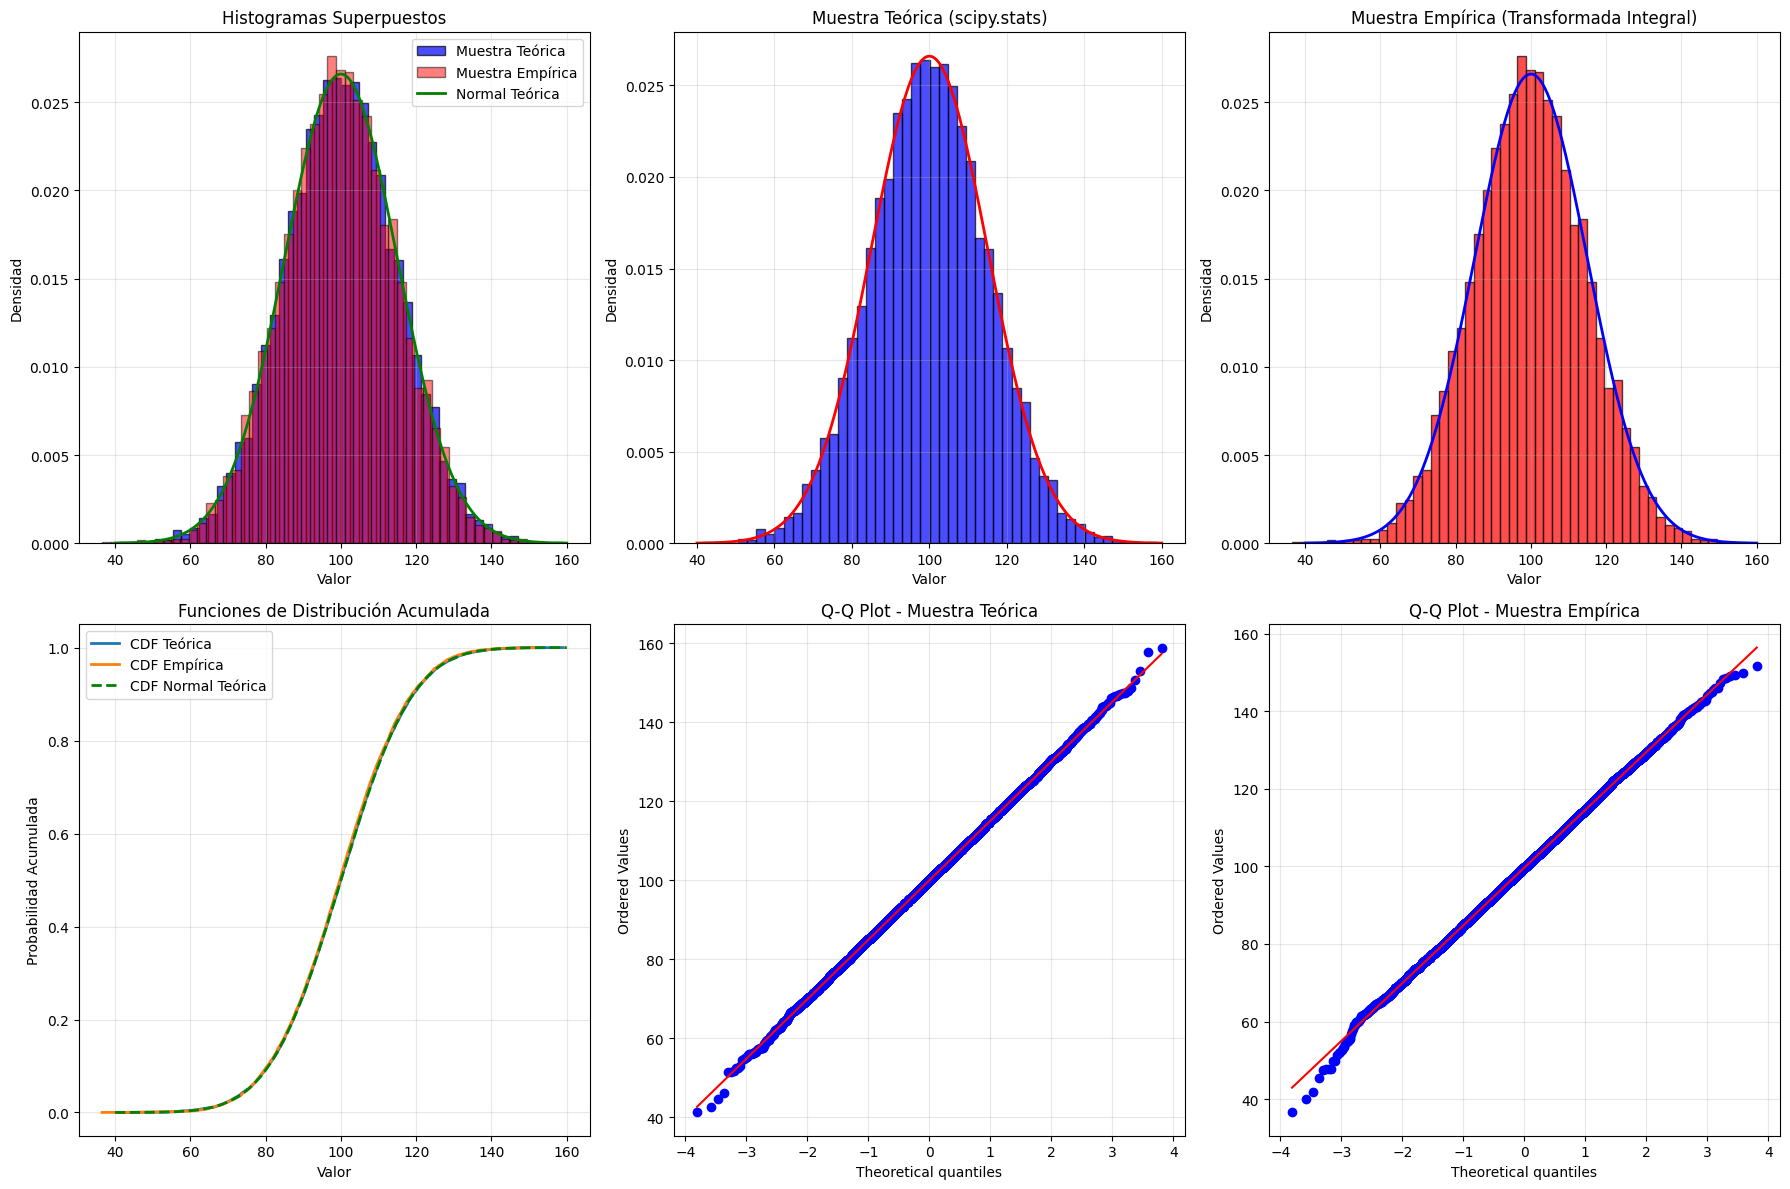

C:\Users\thiag\AppData\Local\Temp\ipykernel_22640\1030908287.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data, labels=labels, patch_artist=True, notch=True)


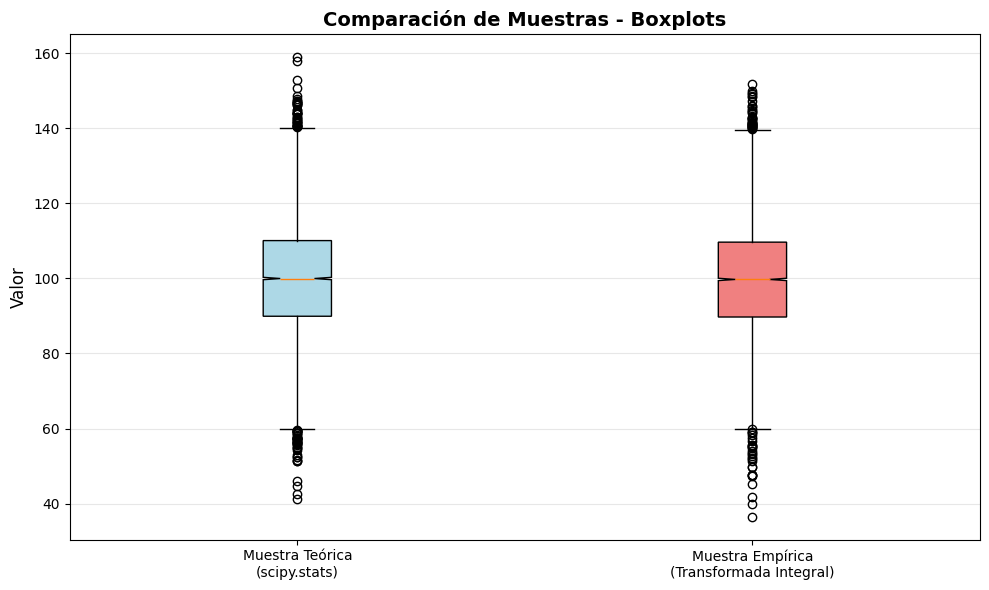


Gráficos guardados: 'comparacion_normal.png' y 'boxplot_comparacion.png'


In [14]:
graficar_comparacion(muestra_teorica, muestra_empirica, mu, sigma)
boxplot_comparacion(muestra_teorica, muestra_empirica)

print(f"\n{'='*60}")
print("Gráficos guardados: 'comparacion_normal.png' y 'boxplot_comparacion.png'")
print("="*60)